In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Read the CSV file into a DataFrame
malware_df = pd.read_csv('/content/drive/MyDrive/ML_Projects/Malware_detection/MalwareData.csv', sep='|')

In [12]:
malware_df.shape

(138047, 57)

In [21]:
print(malware_df.columns)

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [24]:
malware_df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [14]:
#Check for null values in any of the features
null_values = malware_df.isnull().sum()
print(null_values)

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [16]:
# Find rows where column 'legitimate' has value 0
rows_with_0 = malware_df[malware_df['legitimate'] == 0]

# Find rows where column 'legitimate' has value 1
rows_with_1 = malware_df[malware_df['legitimate'] == 1]

print("Range of rows with 'legitimate' value 0:")
print(rows_with_0.index.min(), "-", rows_with_0.index.max())

print("Range of rows with 'legitimate' value 1:")
print(rows_with_1.index.min(), "-", rows_with_1.index.max())

Range of rows with 'legitimate' value 0:
41323 - 138046
Range of rows with 'legitimate' value 1:
0 - 41322


Percentage of DataFrame with Different Values:
legitimate
0    70.065992
1    29.934008
Name: proportion, dtype: float64


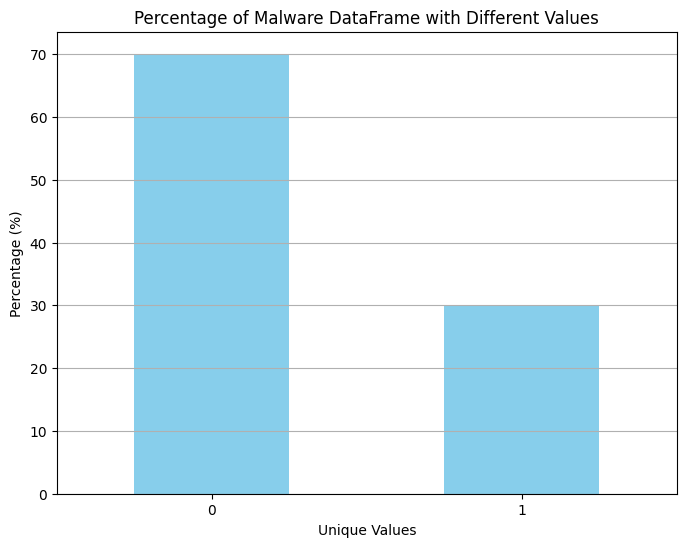

In [20]:
# Calculate the percentage of occurrences for each unique value in column 'legitimate'
percentage_values = malware_df['legitimate'].value_counts(normalize=True) * 100

print("Percentage of DataFrame with Different Values:")
print(percentage_values)

# Plot the percentages using a bar plot
plt.figure(figsize=(8, 6))
percentage_values.plot(kind='bar', color='skyblue')
plt.title('Percentage of Malware DataFrame with Different Values')
plt.xlabel('Unique Values')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Correlation between features

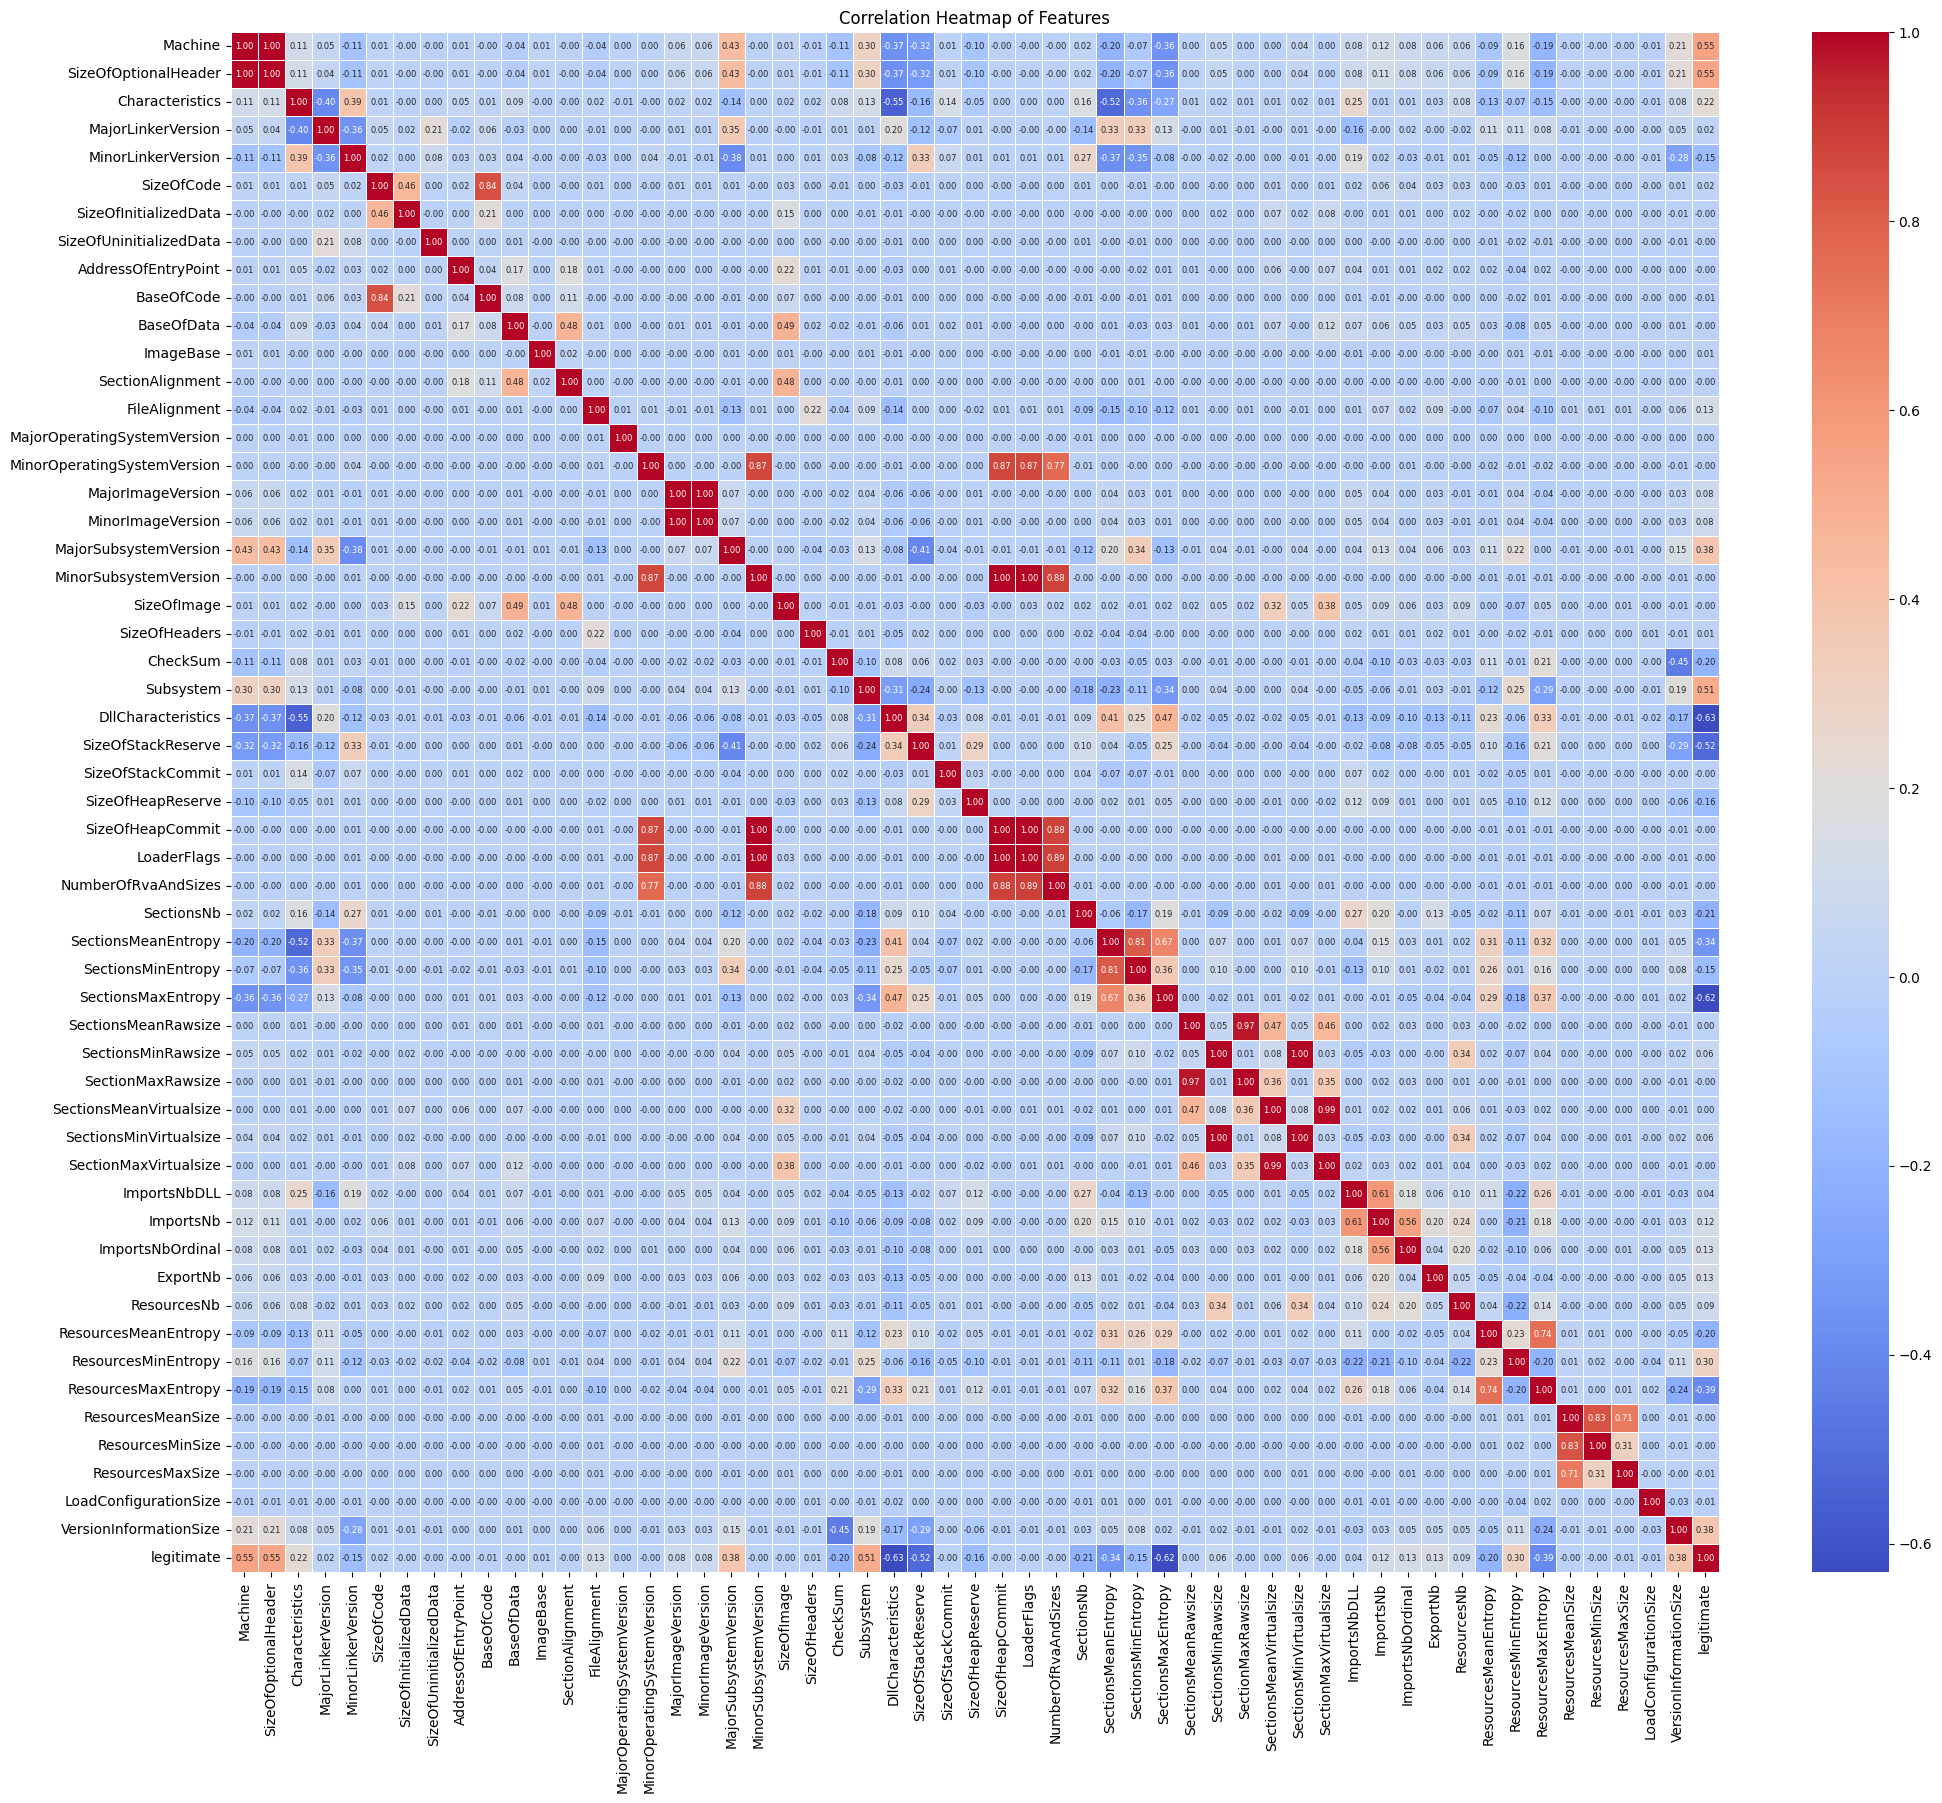

In [80]:
# Compute the correlation matrix
correlation_matrix = malware_df.drop(['Name', 'md5'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(24, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title('Correlation Heatmap of Features')
plt.show()

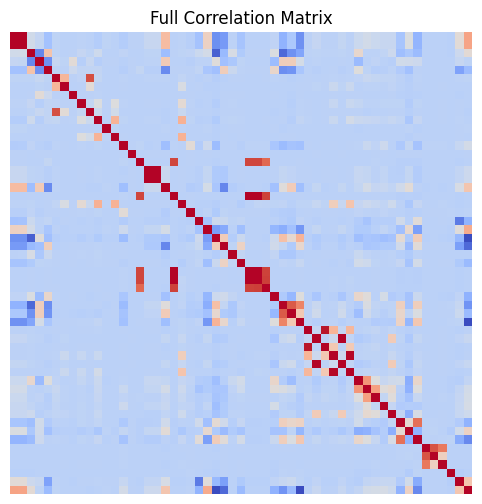

In [83]:
# Plot the full correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.title('Full Correlation Matrix')
plt.axis('off')
plt.show()

# Tree Classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validation

In [64]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Find the index value to split the DataFrame
split_index = 41323

# Split the DataFrame into two parts based on the split index
legit_df = malware_df.loc[:split_index]  # First part (index 0 to split_index)
mal_df = malware_df.loc[split_index + 1:]  # Second part (index split_index + 1 to the end)

# Shuffle both parts independently
legit_df_shuffled = legit_df.sample(frac=1, random_state=42)
mal_df_shuffled = mal_df.sample(frac=1, random_state=42)

# Combine the shuffled parts back together
df_balanced_shuffled = pd.concat([legit_df_shuffled, mal_df_shuffled])

# Split the shuffled DataFrame into training and testing sets while maintaining the 70-30 ratio
X_train_df, X_test_df, y_train_pd, y_test_pd = train_test_split(df_balanced_shuffled.drop(['Name', 'md5', 'legitimate'], axis=1), df_balanced_shuffled['legitimate'], test_size=0.2, stratify=df_balanced_shuffled['legitimate'], random_state=42)

# Check the ratio of target values in the training and testing sets
print("Ratio of target values in training set:")
print(y_train_pd.value_counts(normalize=True))
print("\nRatio of target values in testing set:")
print(y_test_pd.value_counts(normalize=True))

Ratio of target values in training set:
legitimate
0    0.700662
1    0.299338
Name: proportion, dtype: float64

Ratio of target values in testing set:
legitimate
0    0.700652
1    0.299348
Name: proportion, dtype: float64


In [67]:
X_train  = X_train_df.values
y_train = y_train_pd.values
X_test = X_test_df.values
y_test = y_test_pd.values

In [68]:
extratrees = ExtraTreesClassifier().fit(X_train, y_train)
select = SelectFromModel(extratrees, prefit=True)
X_train = select.transform(X_train)

# Apply the same feature selection on test data
X_test = select.transform(X_test)

print(X_train.shape, X_test.shape)

(110437, 13) (27610, 13)


In [69]:
features = X_train.shape[1]
importances = extratrees.feature_importances_
indices = np.argsort(importances)[::-1]

for feature in range(features):
  print("%d"%(feature+1), malware_df.columns[2+indices[feature]], importances[indices[feature]])

1 DllCharacteristics 0.15350006577734795
2 Characteristics 0.11279800345479166
3 Machine 0.08990139012822826
4 SectionsMaxEntropy 0.06935829202775717
5 Subsystem 0.060677321255173895
6 ImageBase 0.05445528134918361
7 VersionInformationSize 0.05415949975002856
8 SizeOfOptionalHeader 0.0496549883193657
9 MajorSubsystemVersion 0.04631891989583099
10 ResourcesMinEntropy 0.03402026960777277
11 ResourcesMaxEntropy 0.032864743503247695
12 SectionsMeanEntropy 0.021055535698724905
13 MajorOperatingSystemVersion 0.01904467946989013


In [70]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=50)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [71]:
# Evaluate the accuracy of the trained model on the test data using the score method
accuracy = classifier_rf.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9940239043824701


In [72]:
# Get the predicted labels for the test data
y_pred = classifier_rf.predict(X_test)

# Confusion Matrix
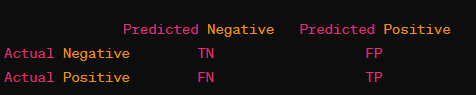

- TN -> Actual '0', Predicted '0' . Is 'Malware' and Predicted 'Malicius'
- FN -> Actual '1', Predicted '0'. Is 'Legitimate' and Predited 'Malicius'
- FP -> Actual '0', Predicted '1'. Is 'Malicius' and Predicted 'Legitimate'
- TP -> Actual '1', Predicted '1'. Is 'Legitimate' and Predicted 'Legitimate'

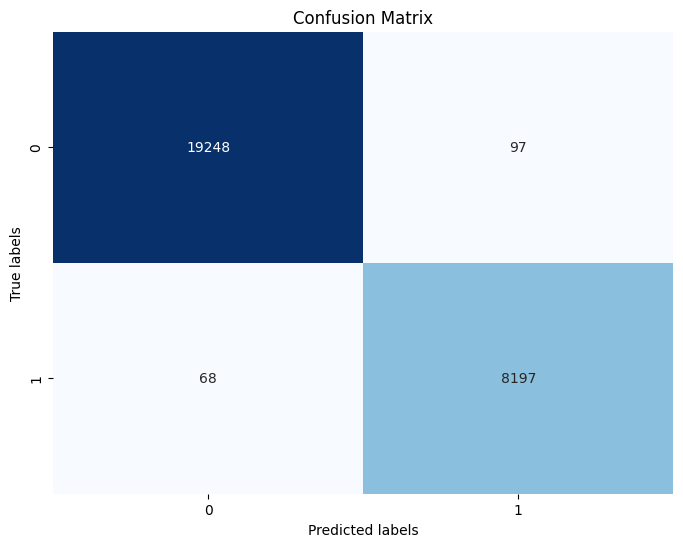

In [74]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()